In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
nba_df = pd.read_csv(r"C:\Users\shrey\OneDrive\Desktop\Thesis\NBA.csv", low_memory=False) 

In [3]:
nba_df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,NaN,36:22,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,NaN,23:54,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,NaN,25:17,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,Malik,G,NaN,30:52,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,D'Angelo,G,NaN,33:46,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0


In [4]:
nba_df.shape

(645953, 29)

In [5]:
nba_df.duplicated().sum()

0

In [6]:
nba_df.isnull().sum()

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             615591
START_POSITION       398738
COMMENT              540351
MIN                  105603
FGM                  105603
FGA                  105603
FG_PCT               105603
FG3M                 105603
FG3A                 105603
FG3_PCT              105603
FTM                  105603
FTA                  105603
FT_PCT               105603
OREB                 105603
DREB                 105603
REB                  105603
AST                  105603
STL                  105603
BLK                  105603
TO                   105603
PF                   105603
PTS                  105603
PLUS_MINUS           129264
dtype: int64

In [7]:
print(str(int(round((nba_df['NICKNAME'].isnull().sum()/nba_df.shape[0])*100,0))) + '%', end=' ')
print('nan values in NICKNAME column.')
print(str(int(round((nba_df['START_POSITION'].isnull().sum()/nba_df.shape[0])*100,0))) + '%', end=' ')
print('nan values in START_POSITION column.')
print(str(int(round((nba_df['COMMENT'].isnull().sum()/nba_df.shape[0])*100,0))) + '%', end=' ') 
print('nan values in COMMENT column.')  

95% nan values in NICKNAME column.
62% nan values in START_POSITION column.
84% nan values in COMMENT column.


In [8]:
nba_df.drop(['NICKNAME','START_POSITION','COMMENT'], axis=1, inplace=True)

In [9]:
nba_df.dropna(subset=['MIN'], inplace=True)    

In [10]:
nba_df['MIN'].dtype

dtype('O')

In [11]:
nba_df['MIN'] = nba_df['MIN'].str.replace(':', '.')

In [12]:
nba_df['MIN'] = nba_df['MIN'].astype(float) 

In [13]:
nba_df = nba_df[nba_df['MIN']!=0.0] 

In [14]:
nba_df.dropna(subset=['PLUS_MINUS'], inplace=True)     

In [15]:
print("Number of Null values in each Column:")

nba_df.isnull().sum()

Number of Null values in each Column:


GAME_ID              0
TEAM_ID              0
TEAM_ABBREVIATION    0
TEAM_CITY            0
PLAYER_ID            0
PLAYER_NAME          0
MIN                  0
FGM                  0
FGA                  0
FG_PCT               0
FG3M                 0
FG3A                 0
FG3_PCT              0
FTM                  0
FTA                  0
FT_PCT               0
OREB                 0
DREB                 0
REB                  0
AST                  0
STL                  0
BLK                  0
TO                   0
PF                   0
PTS                  0
PLUS_MINUS           0
dtype: int64

In [16]:
print("Shape of the DataFrame: ", nba_df.shape)

Shape of the DataFrame:  (516595, 26)


In [17]:
nba_df['PTS'] = (nba_df['FGM']*2) + (nba_df['FG3M']*3) + (nba_df['FTM']*1)  

In [18]:
nba_df['MODIFIED_PLUS_MINUS'] = nba_df.apply(lambda x: 1 if x['PLUS_MINUS']>0 else 0, axis=1)   

In [19]:
print("Checking Values")

nba_df[['PLUS_MINUS','MODIFIED_PLUS_MINUS']].sample(10)

Checking Values


,PLUS_MINUS,MODIFIED_PLUS_MINUS
202029,-5.0,0
434738,-3.0,0
132499,-4.0,0
103826,-7.0,0
147784,-17.0,0
575808,9.0,1
200268,8.0,1
408667,4.0,1
603167,4.0,1
242373,13.0,1


In [20]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516595 entries, 0 to 643293
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   GAME_ID              516595 non-null  int64  
 1   TEAM_ID              516595 non-null  int64  
 2   TEAM_ABBREVIATION    516595 non-null  object 
 3   TEAM_CITY            516595 non-null  object 
 4   PLAYER_ID            516595 non-null  int64  
 5   PLAYER_NAME          516595 non-null  object 
 6   MIN                  516595 non-null  float64
 7   FGM                  516595 non-null  float64
 8   FGA                  516595 non-null  float64
 9   FG_PCT               516595 non-null  float64
 10  FG3M                 516595 non-null  float64
 11  FG3A                 516595 non-null  float64
 12  FG3_PCT              516595 non-null  float64
 13  FTM                  516595 non-null  float64
 14  FTA                  516595 non-null  float64
 15  FT_PCT               5

In [21]:
# teams participated in nba 

print("Teams Participated in NBA:")
teams = nba_df['TEAM_ABBREVIATION'].unique()
teams 

Teams Participated in NBA:


array(['MIN', 'MIA', 'CLE', 'CHI', 'IND', 'SAS', 'MIL', 'GSW', 'TOR',
       'DEN', 'SAC', 'UTA', 'WAS', 'POR', 'ORL', 'LAC', 'ATL', 'DET',
       'BOS', 'DAL', 'HOU', 'NYK', 'MEM', 'CHA', 'NOP', 'PHX', 'LAL',
       'BKN', 'PHI', 'OKC', 'NOH', 'NJN', 'SEA', 'NOK'], dtype=object)

In [22]:
print("Number of Unique Teams: ", len(teams))

Number of Unique Teams:  34


In [23]:
# Top 10 teams with maximum mintues played

team_analysis = nba_df.groupby(['TEAM_ABBREVIATION'])['MIN'].sum().sort_values(ascending=False).nlargest(10) 

In [24]:
team_analysis = team_analysis.reset_index()

In [25]:
print("Top 10 Teams with Maximum Minutes Played:")
team_analysis

Top 10 Teams with Maximum Minutes Played:


,TEAM_ABBREVIATION,MIN
0,MIA,422499.54
1,SAS,421136.90
2,BOS,416716.27
3,LAL,411052.71
4,CLE,405545.20
5,GSW,402980.24
6,DAL,402468.93
7,HOU,401850.54
8,IND,398955.16
9,DEN,398657.40


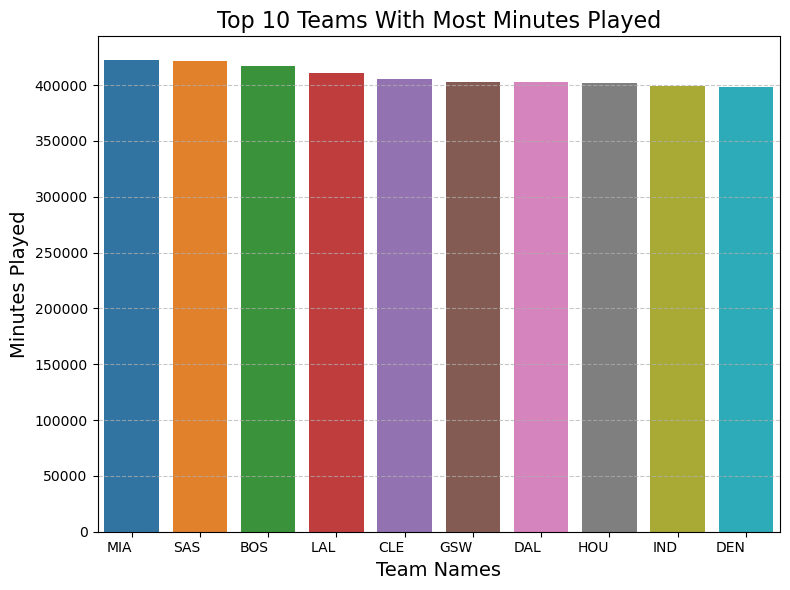

In [26]:
plt.figure(figsize=(8,6))

plt.title('Top 10 Teams With Most Minutes Played', fontsize=16)
sns.barplot(data=team_analysis, x='TEAM_ABBREVIATION', y='MIN')
plt.xticks(rotation=0, ha='right')
plt.xlabel('Team Names', fontsize=14)
plt.ylabel('Minutes Played',fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [27]:
# top teams with most points

team_analysis = nba_df.groupby(['TEAM_ABBREVIATION'])['PTS'].sum().sort_values(ascending=False).nlargest(10) 

In [28]:
team_analysis = team_analysis.reset_index()

In [29]:
print("Top 10 Teams with Most Points:")
team_analysis

Top 10 Teams with Most Points:


,TEAM_ABBREVIATION,PTS
0,GSW,214427.0
1,HOU,208836.0
2,SAS,208202.0
3,BOS,205438.0
4,MIA,205409.0
5,LAL,205005.0
6,PHX,203462.0
7,DEN,203181.0
8,DAL,203106.0
9,CLE,198367.0


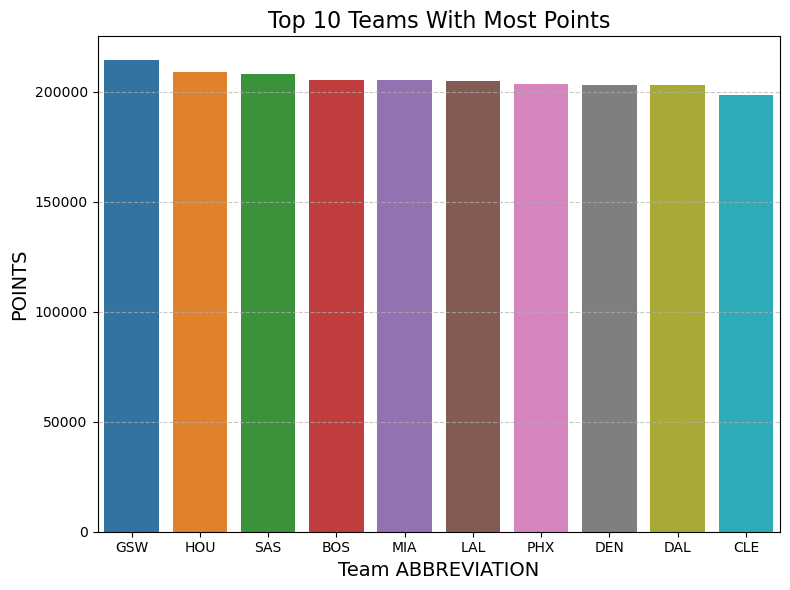

In [30]:
plt.figure(figsize=(8,6))
plt.title('Top 10 Teams With Most Points', fontsize=16)
sns.barplot(data=team_analysis, x='TEAM_ABBREVIATION', y='PTS')
plt.xlabel('Team ABBREVIATION', fontsize=14)
plt.ylabel('POINTS',fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show() 

In [31]:
# players with most minutes 

players_analysis = nba_df.groupby('PLAYER_NAME')['MIN'].sum().sort_values(ascending=False).nlargest(10)

In [32]:
players_analysis = players_analysis.reset_index()

In [33]:
print("Top 10 Players with Most Minutes Played:")
players_analysis

Top 10 Players with Most Minutes Played:


,PLAYER_NAME,MIN
0,LeBron James,63147.21
1,Carmelo Anthony,46927.58
2,Chris Paul,44977.70
3,Andre Iguodala,44867.96
4,Joe Johnson,44334.59
5,Dwight Howard,43419.41
6,Dwyane Wade,42880.11
7,Dirk Nowitzki,42845.44
8,Kevin Durant,40454.45
9,Pau Gasol,40241.91


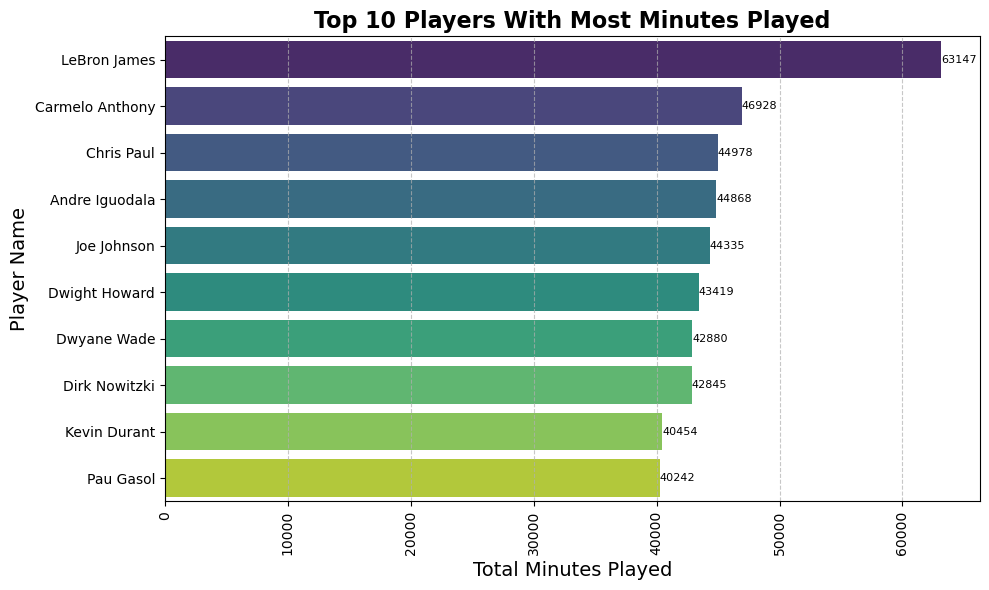

In [34]:
plt.figure(figsize=(10, 6))

data = sns.barplot(data=players_analysis, x='MIN', y='PLAYER_NAME', palette='viridis')

for val in data.containers:
    data.bar_label(val, fmt='%.0f', fontsize=8, color='black')

plt.title('Top 10 Players With Most Minutes Played', fontsize=16, fontweight='bold')
plt.xlabel('Total Minutes Played', fontsize=14)
plt.ylabel('Player Name', fontsize=14)
plt.xticks(rotation='vertical')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


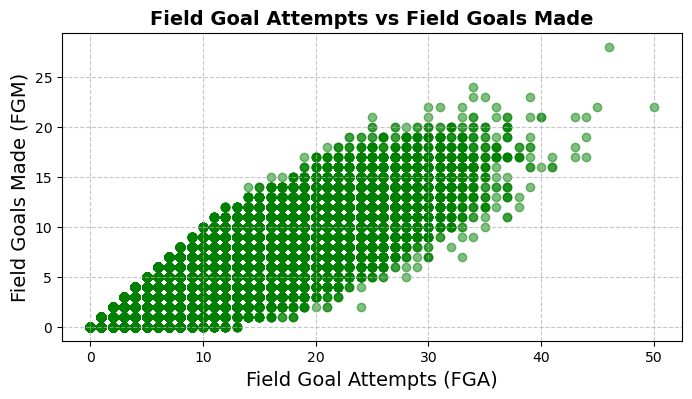

In [35]:
# FGM VS FGA

plt.figure(figsize=(8, 4))

plt.scatter(nba_df['FGA'], nba_df['FGM'], color='Green', alpha=0.5)

plt.title('Field Goal Attempts vs Field Goals Made', fontsize=14, fontweight='bold')
plt.xlabel('Field Goal Attempts (FGA)', fontsize=14)
plt.ylabel('Field Goals Made (FGM)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [36]:
# players with most FGM points

players_analysis = nba_df.groupby('PLAYER_NAME')['FGM'].sum().sort_values(ascending=False).nlargest(10) 

In [37]:
players_analysis = players_analysis.reset_index()

In [38]:
print('Players with Most FGM Points: ')

players_analysis

Players with Most FGM Points: 


,PLAYER_NAME,FGM
0,LeBron James,16317.0
1,Carmelo Anthony,10926.0
2,Kevin Durant,10254.0
3,Dwyane Wade,10027.0
4,Dirk Nowitzki,9626.0
5,Russell Westbrook,9322.0
6,Kobe Bryant,9208.0
7,LaMarcus Aldridge,9068.0
8,Tony Parker,8490.0
9,Chris Paul,8456.0


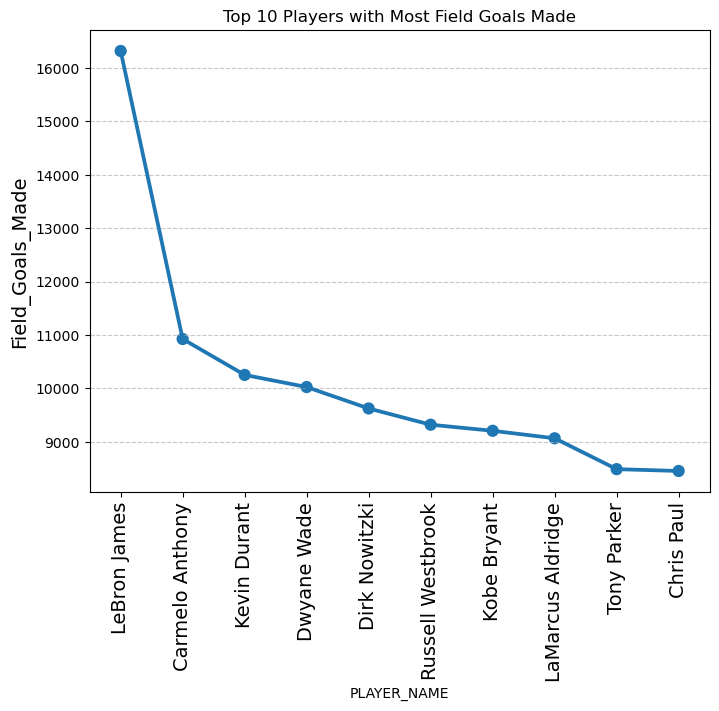

In [39]:
plt.figure(figsize=(8,6))

sns.pointplot(data=players_analysis, x='PLAYER_NAME', y='FGM')
plt.title('Top 10 Players with Most Field Goals Made')
plt.ylabel('Field_Goals_Made', fontsize=14)
plt.xticks(rotation='vertical',fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show() 

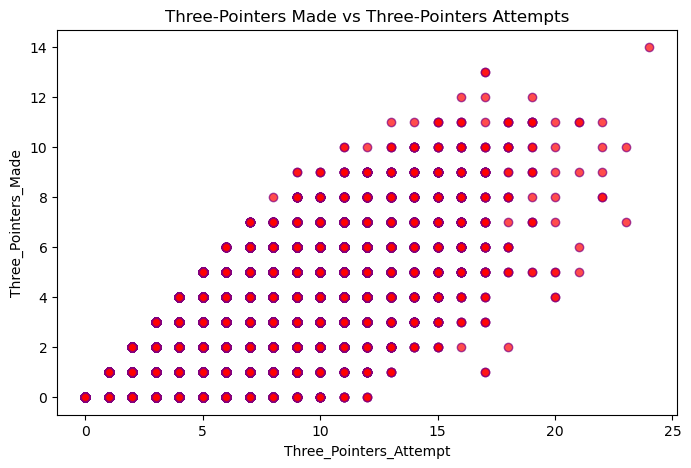

In [52]:
# Three-Pointers Made vs Three-Pointers Attempts

plt.figure(figsize=(8,5))

plt.scatter(nba_df['FG3A'], nba_df['FG3M'], alpha=0.7, color='red', edgecolors='purple')  
plt.title('Three-Pointers Made vs Three-Pointers Attempts')
plt.xlabel('Three_Pointers_Attempt')
plt.ylabel('Three_Pointers_Made')
plt.show()  

In [41]:
# players with most FG3M points

players_analysis = nba_df.groupby('PLAYER_NAME')['FG3M'].sum().sort_values(ascending=False).nlargest(10) 

In [42]:
players_analysis = players_analysis.reset_index()

In [43]:
print("Top 10 Players with Most Three-Point Field Goals Made (FG3M):")
players_analysis 

Top 10 Players with Most Three-Point Field Goals Made (FG3M):


,PLAYER_NAME,FG3M
0,Stephen Curry,3737.0
1,James Harden,3015.0
2,Kyle Korver,2768.0
3,LeBron James,2573.0
4,Damian Lillard,2417.0
5,Klay Thompson,2317.0
6,JR Smith,2248.0
7,JJ Redick,2207.0
8,Jamal Crawford,2202.0
9,Kyle Lowry,2188.0


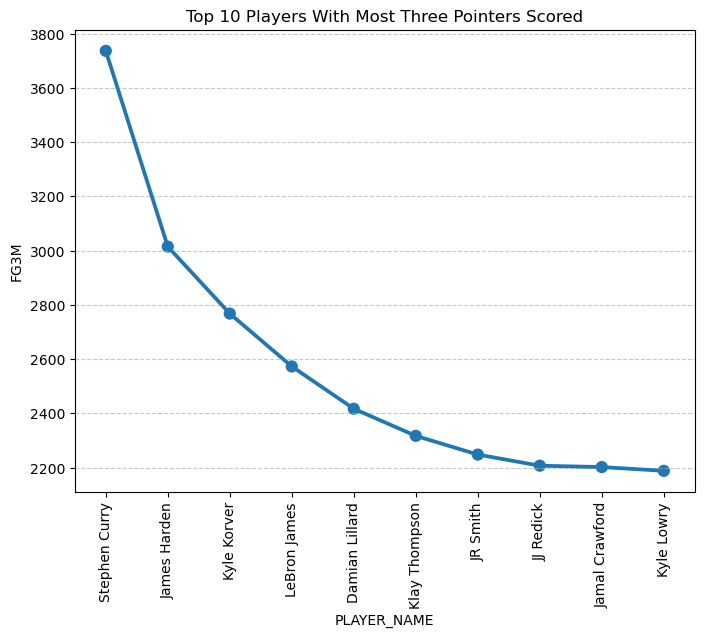

In [44]:
plt.figure(figsize=(8,6))

sns.pointplot(data=players_analysis, x='PLAYER_NAME', y='FG3M')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Top 10 Players With Most Three Pointers Scored')
plt.xticks(rotation='vertical')
plt.show()  

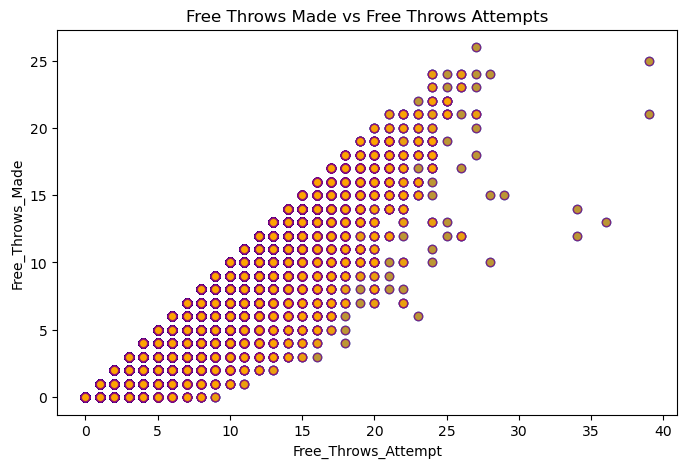

In [50]:
plt.figure(figsize=(8,5))

plt.scatter(nba_df['FTA'],nba_df['FTM'])  

plt.scatter(nba_df['FTA'], nba_df['FTM'], alpha=0.7, color='orange', edgecolors='purple')
plt.title('Free Throws Made vs Free Throws Attempts')
plt.xlabel('Free_Throws_Attempt')
plt.ylabel('Free_Throws_Made')
plt.show()  

In [468]:
# players with most FTM points

players_analysis = nba_df.groupby('PLAYER_NAME')['FTM'].sum().sort_values(ascending=False).nlargest(10)   

In [469]:
players_analysis = players_analysis.reset_index()

In [470]:
print("Top 10 Players with Most Free Throws Made (FTM):")
players_analysis

Top 10 Players with Most Free Throws Made (FTM):


,PLAYER_NAME,FTM
0,LeBron James,9640.0
1,James Harden,8098.0
2,Kevin Durant,7396.0
3,Carmelo Anthony,6862.0
4,Dwyane Wade,6718.0
5,Kobe Bryant,6599.0
6,Dirk Nowitzki,6328.0
7,Russell Westbrook,6241.0
8,Dwight Howard,5943.0
9,DeMar DeRozan,5612.0


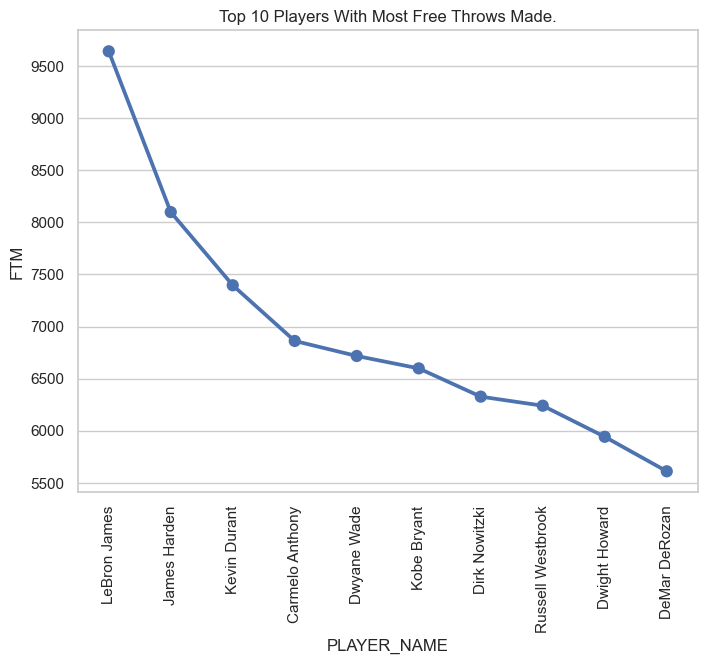

In [471]:
plt.figure(figsize=(8,6))

sns.pointplot(data=players_analysis, x='PLAYER_NAME', y='FTM')
plt.title('Top 10 Players With Most Free Throws Made.')
plt.xticks(rotation='vertical')
plt.show()   

In [472]:
# players with most REB points 

players_analysis = nba_df.groupby('PLAYER_NAME')['REB'].sum().sort_values(ascending=False).nlargest(10)    

In [473]:
players_analysis = players_analysis.reset_index() 

In [474]:
print("Top 10 Players with Most Total Rebounds (REB):")
players_analysis

Top 10 Players with Most Total Rebounds (REB):


,PLAYER_NAME,REB
0,Dwight Howard,16238.0
1,LeBron James,12653.0
2,Tim Duncan,11490.0
3,Pau Gasol,11270.0
4,DeAndre Jordan,11001.0
5,Zach Randolph,10480.0
6,Tyson Chandler,10334.0
7,Andre Drummond,10001.0
8,Dirk Nowitzki,9641.0
9,LaMarcus Aldridge,9524.0


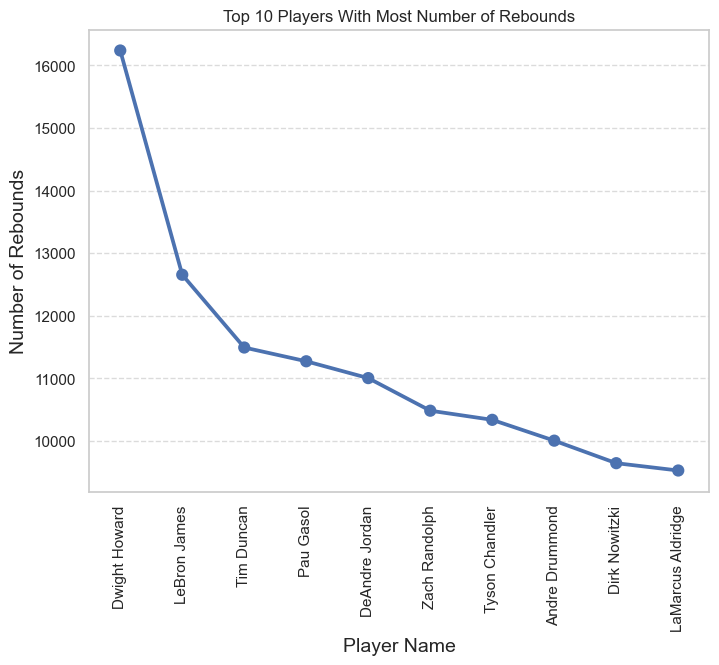

In [475]:
plt.figure(figsize=(8,6))

sns.pointplot(data=players_analysis, x='PLAYER_NAME', y='REB')

plt.title('Top 10 Players With Most Number of Rebounds')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Player Name', fontsize=14)
plt.ylabel('Number of Rebounds', fontsize=14)
plt.xticks(rotation='vertical')
plt.show()    

In [476]:
# players with most AST points 

players_analysis = nba_df.groupby('PLAYER_NAME')['AST'].sum().sort_values(ascending=False).nlargest(10)    

In [477]:
players_analysis = players_analysis.reset_index() 

In [478]:
print("Top 10 Players with Most Assists (AST):")
players_analysis

Top 10 Players with Most Assists (AST):


,PLAYER_NAME,AST
0,Chris Paul,12215.0
1,LeBron James,12047.0
2,Russell Westbrook,9593.0
3,Rajon Rondo,8842.0
4,Steve Nash,8483.0
5,Deron Williams,7489.0
6,Tony Parker,7360.0
7,James Harden,7333.0
8,Kyle Lowry,7121.0
9,Jason Kidd,6664.0


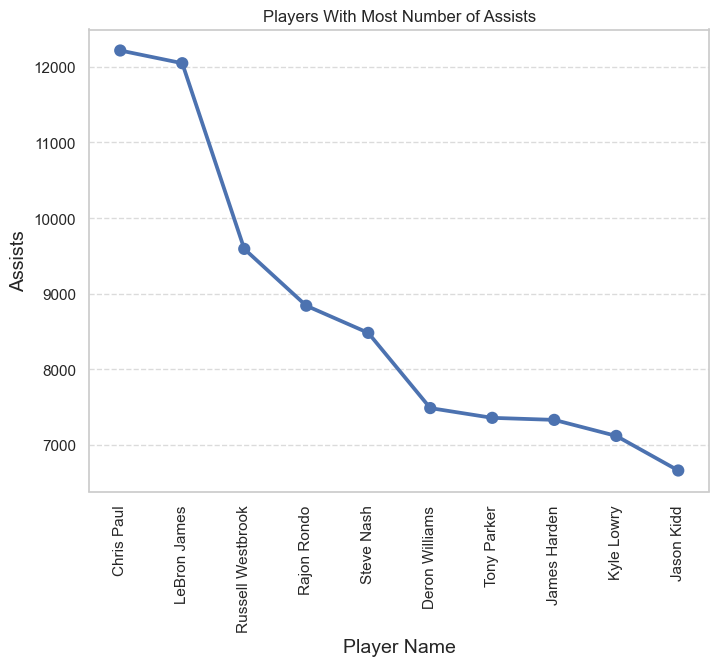

In [479]:
plt.figure(figsize=(8,6))

sns.pointplot(data=players_analysis, x='PLAYER_NAME', y='AST')

plt.title('Players With Most Number of Assists')
plt.xticks(rotation='vertical')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Player Name', fontsize=14)
plt.ylabel('Assists', fontsize=14)

plt.show()   

In [480]:
# players with most number of blocks by player 

players_analysis = nba_df.groupby('PLAYER_NAME')['BLK'].sum().sort_values(ascending=False).nlargest(10)    

In [481]:
players_analysis = players_analysis.reset_index() 

In [482]:
print("Top 10 Players with Most Blocks (BLK):")
players_analysis

Top 10 Players with Most Blocks (BLK):


,PLAYER_NAME,BLK
0,Dwight Howard,2500.0
1,Tim Duncan,2245.0
2,Serge Ibaka,2077.0
3,Pau Gasol,1885.0
4,Josh Smith,1829.0
5,Brook Lopez,1676.0
6,DeAndre Jordan,1645.0
7,Marcus Camby,1636.0
8,Samuel Dalembert,1587.0
9,Anthony Davis,1545.0


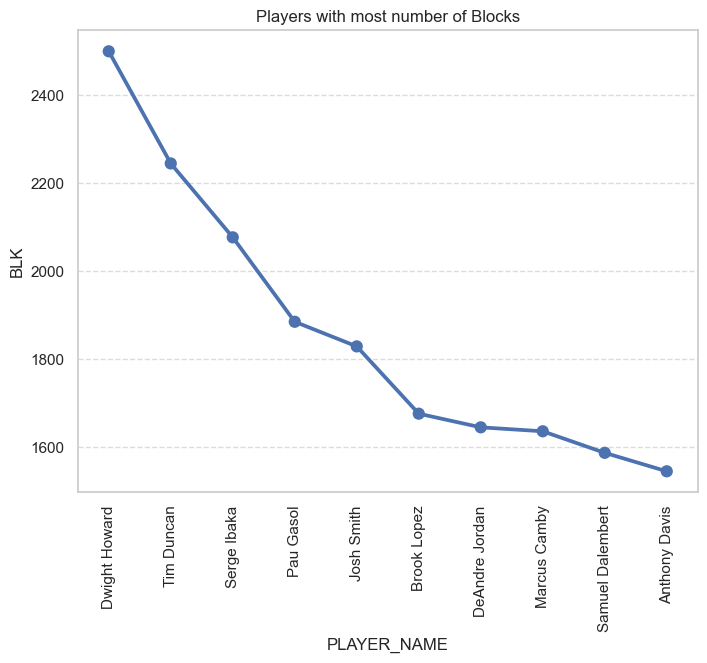

In [484]:
plt.figure(figsize=(8,6))

sns.pointplot(data=players_analysis, x='PLAYER_NAME', y='BLK')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Players with most number of Blocks')
plt.xticks(rotation='vertical')
plt.show()   

In [491]:
# players with most TO points 

players_analysis = nba_df.groupby('PLAYER_NAME')['TO'].sum().sort_values(ascending=False).nlargest(10)     

In [492]:
players_analysis = players_analysis.reset_index() 

In [493]:
print("Top 10 Players with Most Turnovers (TO):")
players_analysis

Top 10 Players with Most Turnovers (TO):


,PLAYER_NAME,TO
0,LeBron James,5808.0
1,Russell Westbrook,4699.0
2,James Harden,4112.0
3,Dwyane Wade,3974.0
4,Dwight Howard,3688.0
5,Kevin Durant,3438.0
6,Carmelo Anthony,3324.0
7,Chris Paul,3184.0
8,Stephen Curry,3101.0
9,Kobe Bryant,3084.0


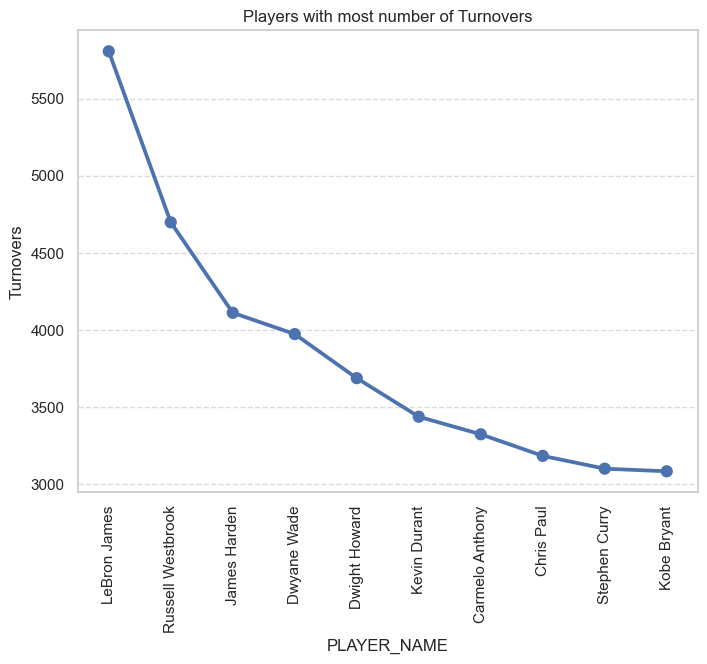

In [496]:
plt.figure(figsize=(8,6))

sns.pointplot(data=players_analysis, x='PLAYER_NAME', y='TO')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Players with most number of Turnovers')
plt.ylabel('Turnovers')
plt.xticks(rotation='vertical')
plt.show()   

In [506]:
# players with most number fouls  

players_analysis = nba_df.groupby('PLAYER_NAME')['PF'].sum().sort_values(ascending=False).nlargest(10)    

In [507]:
players_analysis = players_analysis.reset_index() 

In [508]:
print("Top 10 Players with Most Personal Fouls (PF):")
players_analysis 

Top 10 Players with Most Personal Fouls (PF):


,PLAYER_NAME,PF
0,Dwight Howard,4450.0
1,Carmelo Anthony,3890.0
2,Paul Millsap,3698.0
3,Vince Carter,3332.0
4,Chris Paul,3255.0
5,Kyle Lowry,3195.0
6,Tyson Chandler,3194.0
7,LeBron James,3148.0
8,Russell Westbrook,3041.0
9,Paul Pierce,3035.0


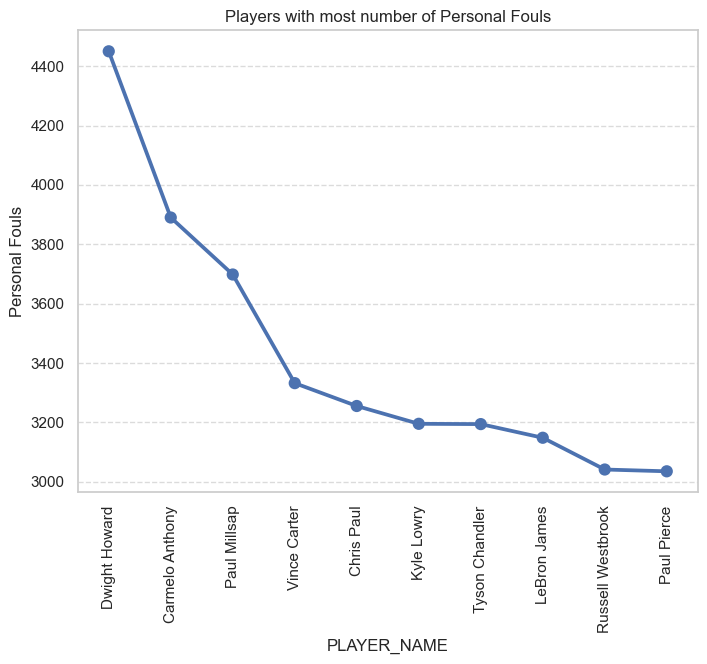

In [509]:
plt.figure(figsize=(8,6))

sns.pointplot(data=players_analysis, x='PLAYER_NAME', y='PF')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Players with most number of Personal Fouls')
plt.ylabel('Personal Fouls')
plt.xticks(rotation='vertical')
plt.show()   

In [500]:
# players with most points 

players_analysis = nba_df.groupby('PLAYER_NAME')['PTS'].sum().sort_values(ascending=False).nlargest(10)     

In [501]:
players_analysis = players_analysis.reset_index() 

In [417]:
print("Top 10 Players with Most Points (PTS):")
players_analysis  

Top 10 Players with Most Points (PTS):


,PLAYER_NAME,PTS
0,LeBron James,49993.0
1,Carmelo Anthony,34333.0
2,Kevin Durant,34258.0
3,James Harden,33201.0
4,Stephen Curry,31431.0
5,Dirk Nowitzki,30167.0
6,Kobe Bryant,29854.0
7,Dwyane Wade,28791.0
8,Russell Westbrook,28788.0
9,Chris Paul,27449.0


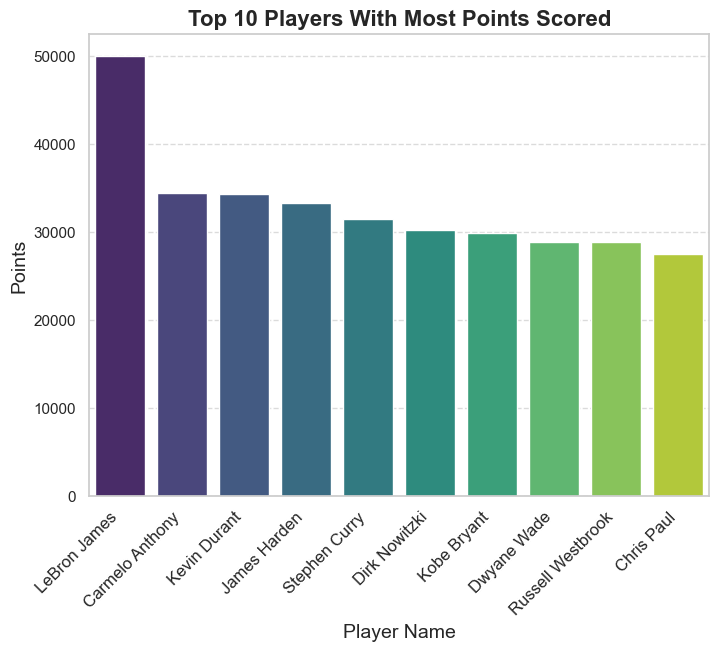

In [419]:
plt.figure(figsize=(8, 6))

sns.barplot(data=players_analysis, x='PLAYER_NAME', y='PTS', palette='viridis')
plt.title('Top 10 Players With Most Points Scored', fontsize=16, fontweight='bold')
plt.xlabel('Player Name', fontsize=14)
plt.ylabel('Points', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


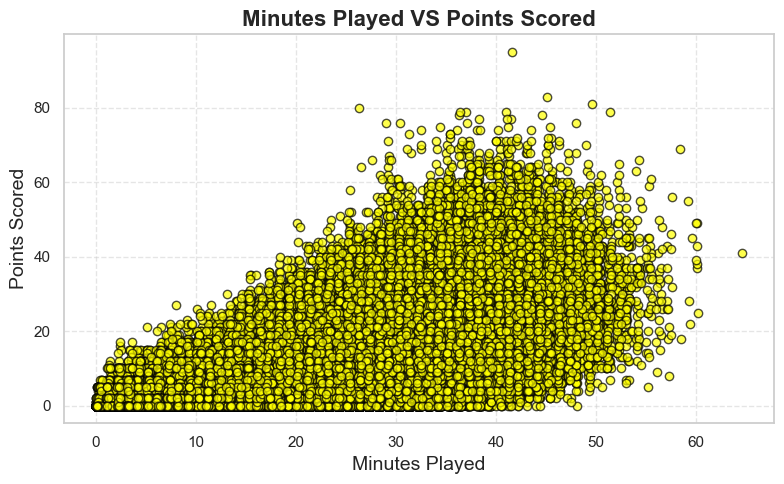

In [511]:
plt.figure(figsize=(8, 5))

plt.scatter(nba_df['MIN'], nba_df['PTS'], alpha=0.7, color='Yellow', edgecolors='black')
plt.title('Minutes Played VS Points Scored', fontsize=16, fontweight='bold')
plt.xlabel('Minutes Played', fontsize=14)
plt.ylabel('Points Scored', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [421]:
def player_statistics(player_name):
    
    games_count = nba_df[nba_df['PLAYER_NAME']==player_name]['GAME_ID'].value_counts().shape[0] 
    clubs_played = nba_df[nba_df['PLAYER_NAME']==player_name]['TEAM_ABBREVIATION'].unique().tolist()
    minutes_count = round(sum(nba_df[nba_df['PLAYER_NAME']==player_name]['MIN'].tolist()),3)
    fgm_points = sum(nba_df[nba_df['PLAYER_NAME']==player_name]['FGM'].tolist())
    fg3m_points = sum(nba_df[nba_df['PLAYER_NAME']==player_name]['FG3M'].tolist())
    ftm_points = sum(nba_df[nba_df['PLAYER_NAME']==player_name]['FTM'].tolist())
    reb_points = sum(nba_df[nba_df['PLAYER_NAME']==player_name]['REB'].tolist()) 
    astist_points = sum(nba_df[nba_df['PLAYER_NAME']==player_name]['AST'].tolist())
    steal_points = sum(nba_df[nba_df['PLAYER_NAME']=='LeBron James']['STL'].tolist())  
    block_points = sum(nba_df[nba_df['PLAYER_NAME']==player_name]['BLK'].tolist()) 
    take_over = sum(nba_df[nba_df['PLAYER_NAME']==player_name]['TO'].tolist()) 
    fouls = sum(nba_df[nba_df['PLAYER_NAME']==player_name]['PF'].tolist())  
    overall_points = sum(nba_df[nba_df['PLAYER_NAME']==player_name]['PTS'].tolist())   
    
    player_dataframe = pd.DataFrame([{ 
        'Player_Name':player_name,
        'Games_Played':games_count,
        'Clubs_Played':clubs_played,
        'MIN':minutes_count,
        'FGM':fgm_points,
        'FG3M':fg3m_points,
        'FTM':ftm_points,
        'REB':reb_points,
        'AST':astist_points,
        'STL':steal_points,
        'BLK':block_points,
        'TO':take_over,
        'PF':fouls,
        'PTS':overall_points }]) 
    
    return player_dataframe

In [299]:
print("Player Carrier Statistics: ")

player_statistics('Stephen Curry') 

Player Carrier Statistics: 


,Player_Name,Games_Played,Clubs_Played,MIN,FGM,FG3M,FTM,REB,AST,STL,BLK,TO,PF,PTS
0,Stephen Curry,977,[GSW],33481.16,8152.0,3737.0,3916.0,4590.0,6290.0,2619.0,233.0,3101.0,2346.0,31431.0


In [300]:
nba_df = nba_df[['MIN','FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','FTM','FTA','FT_PCT','REB','AST','STL','BLK','TO','PF','PTS','MODIFIED_PLUS_MINUS']] 

In [ ]:
nba_df.head()

In [ ]:
print("Shape of the DataFrame: ", nba_df.shape)

In [151]:
print("Count of Null Values in Each Column:")

nba_df.isnull().sum()

Count of Null Values in Each Column:


MIN                    0
FGM                    0
FGA                    0
FG_PCT                 0
FG3M                   0
FG3A                   0
FG3_PCT                0
FTM                    0
FTA                    0
FT_PCT                 0
REB                    0
AST                    0
STL                    0
BLK                    0
TO                     0
PF                     0
PTS                    0
MODIFIED_PLUS_MINUS    0
dtype: int64

In [152]:
nba_df.describe()

,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,REB,AST,STL,BLK,TO,PF,PTS,MODIFIED_PLUS_MINUS
count,516595.000000,516595.000000,516595.000000,516595.000000,516595.000000,516595.000000,516595.000000,516595.000000,516595.000000,516595.000000,516595.000000,516595.000000,516595.000000,516595.000000,516595.000000,516595.000000,516595.000000,516595.000000
mean,22.939543,3.619987,7.964409,0.416745,0.779380,2.187551,0.201036,1.734765,2.284604,0.435271,4.091300,2.118364,0.723437,0.464575,1.317347,2.000412,11.312880,0.460270
std,11.286409,3.048452,5.714219,0.251157,1.228051,2.569573,0.289442,2.361663,2.895409,0.428270,3.511606,2.492652,0.975084,0.867335,1.403382,1.501170,9.706031,0.498419
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.470000,1.000000,3.000000,0.267000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000
50%,23.390000,3.000000,7.000000,0.429000,0.000000,1.000000,0.000000,1.000000,2.000000,0.500000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,9.000000,0.000000
75%,32.070000,5.000000,11.000000,0.571000,1.000000,4.000000,0.400000,3.000000,4.000000,0.909000,6.000000,3.000000,1.000000,1.000000,2.000000,3.000000,17.000000,1.000000
max,64.580000,28.000000,50.000000,1.000000,14.000000,24.000000,1.000000,26.000000,39.000000,1.000000,31.000000,25.000000,10.000000,12.000000,12.000000,6.000000,95.000000,1.000000


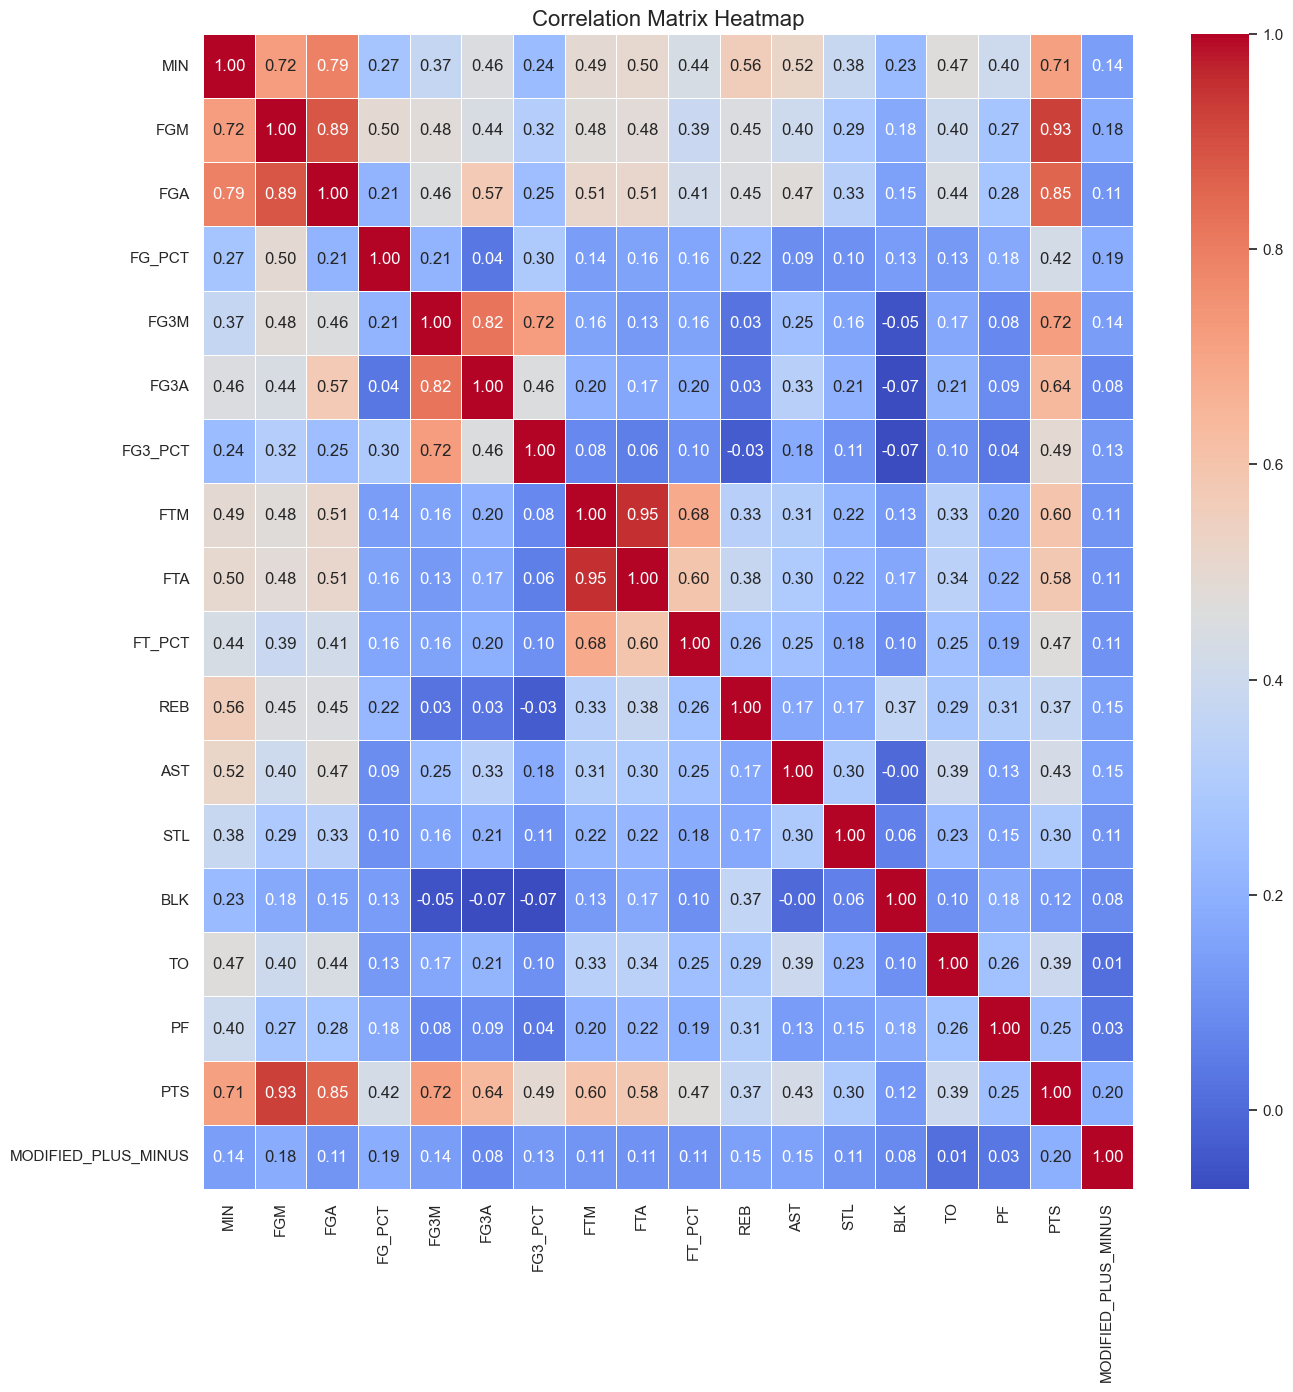

In [301]:
plt.figure(figsize=(15, 15))
correlation_matrix = nba_df.corr()
plt.title('Correlation Matrix Heatmap', fontsize=16)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show() 

In [302]:
X = nba_df[['MIN','FGM','FG3M','FTM','REB','AST','STL','BLK','TO','PF','PTS']] 
y = nba_df['MODIFIED_PLUS_MINUS'] 

In [303]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

In [304]:
print(X_train.shape, X_test.shape) 

(413276, 11) (103319, 11)


In [305]:
from sklearn.linear_model import LogisticRegression 

In [306]:
log_model = LogisticRegression(solver='liblinear') 

In [307]:
log_model.fit(X_train,y_train)  

LogisticRegression(solver='liblinear')

In [308]:
list_of_weights = log_model.coef_.tolist()[0] 

In [309]:
list_of_columns = X.columns.tolist()

In [310]:
nba_weight_df = pd.DataFrame({'Column':list_of_columns,'Weight':list_of_weights}) 

In [311]:
nba_weight_df

,Column,Weight
0,MIN,-0.022940
1,FGM,-0.016299
2,FG3M,0.030637
3,FTM,-0.011916
4,REB,0.081720
5,AST,0.121571
6,STL,0.138298
7,BLK,0.129044
8,TO,-0.177875
9,PF,-0.020037


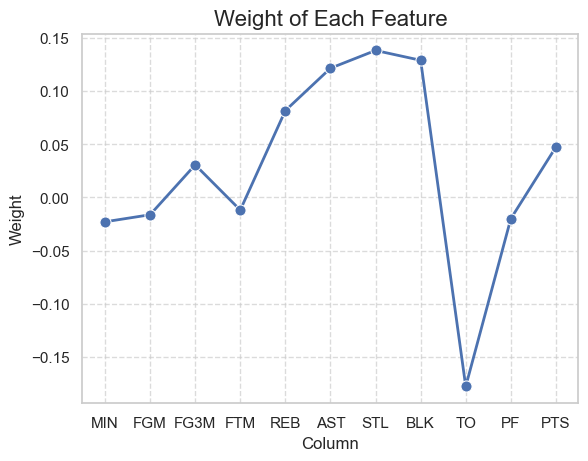

In [312]:
# line plot showing weight of each feature

sns.lineplot(data=nba_weight_df, x='Column', y='Weight', marker='o', markersize=8, linewidth=2)
plt.title('Weight of Each Feature', fontsize=16)
sns.set(style="whitegrid")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [313]:
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix   

In [314]:
y_pred = log_model.predict(X_test) 

In [315]:
logistic_reg_accuracy = accuracy_score(y_test,y_pred) 

In [316]:
logistic_reg_accuracy

0.6184051336153079

In [317]:
y_pred_train = log_model.predict(X_train)  

In [318]:
accuracy_score(y_train,y_pred_train)   

0.6171202779740416

In [319]:
print(classification_report(y_test, y_pred))   

              precision    recall  f1-score   support

           0       0.62      0.77      0.69     55871
           1       0.62      0.44      0.52     47448

    accuracy                           0.62    103319
   macro avg       0.62      0.61      0.60    103319
weighted avg       0.62      0.62      0.61    103319



In [320]:
confusion_matrix(y_test, y_pred) 

array([[42939, 12932],
       [26494, 20954]], dtype=int64)

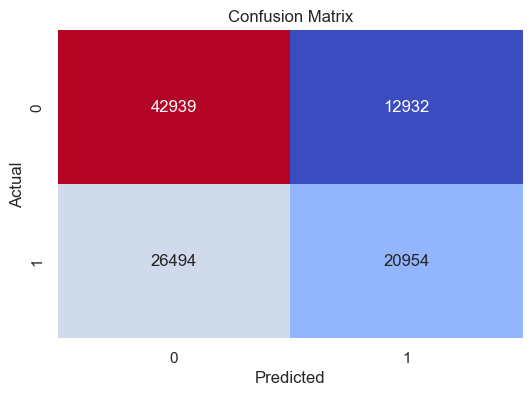

In [321]:
conf_mat = confusion_matrix(y_test, y_pred) 

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()   

In [322]:
import pickle

In [323]:
pickle.dump(log_model, open('Player_Ability.pkl','wb'))  

In [324]:
predict_output = pickle.load(open('Player_Ability.pkl','rb'))     

In [325]:
dataframe = pd.DataFrame([{ 
    'MIN':24.00,'FGM':3,'FG3M':2,'FTM':2,'REB':2,'AST':3,'STL':2,'BLK':1,'TO':2,'PF':1,'PTS':14 }]) 

In [326]:
dataframe

,MIN,FGM,FG3M,FTM,REB,AST,STL,BLK,TO,PF,PTS
0,24.0,3,2,2,2,3,2,1,2,1,14


In [327]:
predicted_ans = predict_output.predict(dataframe)[0] 

In [328]:
if predicted_ans==1:
    print('based on player performace, position impact') 
else:
    print('based on player performance, negative impact')

based on player performace, position impact


In [329]:
from sklearn.neighbors import KNeighborsClassifier

In [330]:
knn_model = KNeighborsClassifier(n_neighbors=5) 

In [331]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [332]:
y_pred_knn = knn_model.predict(X_test)

In [333]:
knn_accuracy = accuracy_score(y_test,y_pred_knn)  

In [334]:
knn_accuracy

0.5697887126278807

In [335]:
accuracy_data = {
    'Model': ['Logistic Regression','KNN Algorithm'],
    'Accuracy': [logistic_reg_accuracy,knn_accuracy] 
}

accuracy_df = pd.DataFrame(accuracy_data)

print("Accuracy Table:")
accuracy_df 

Accuracy Table:


,Model,Accuracy
0,Logistic Regression,0.618405
1,KNN Algorithm,0.569789
